<a href="https://colab.research.google.com/github/ERDECE/UTS_MN/blob/main/23422024_RanggaDwiCahyono_PengolahanCitraDigital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving gambar collab.jpg to gambar collab.jpg


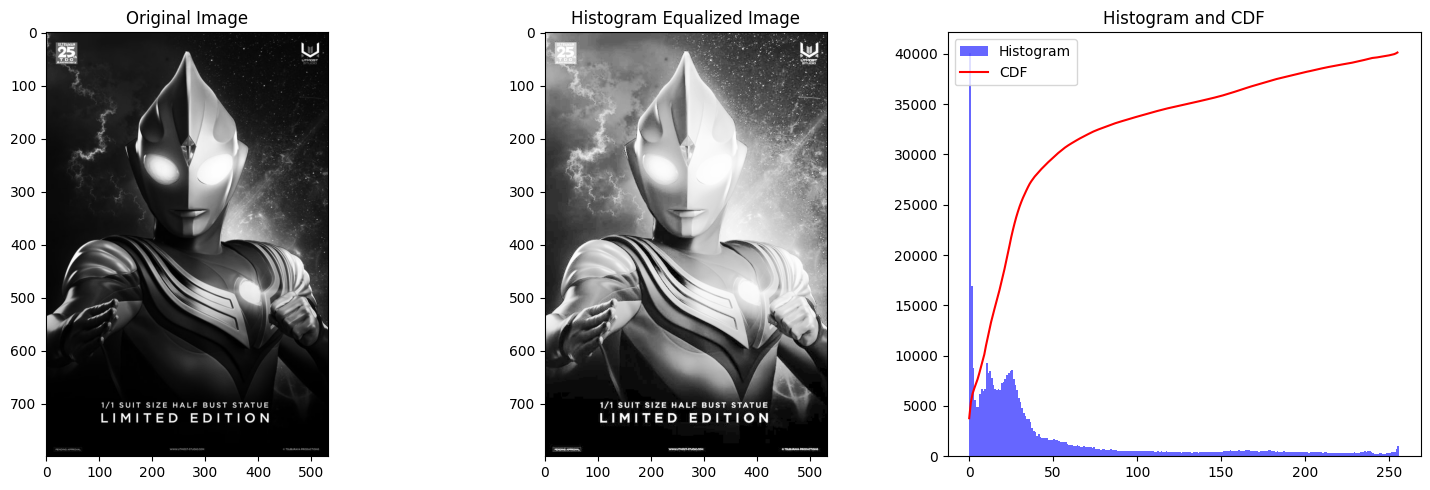

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image

# Fungsi untuk histogram equalization
def histogram_equalization(img):
    # Hitung histogram dan CDF (Cumulative Distribution Function)
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()  # Normalisasi CDF untuk plotting

    # CDF yang telah distandardisasi agar tidak ada nilai nol
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    # Terapkan histogram equalization
    img_equalized = cdf[img]
    return img_equalized, cdf_normalized

# Upload gambar dari lokal
uploaded = files.upload()
file_path = list(uploaded.keys())[0]

# Membaca gambar dalam mode grayscale
img = Image.open(BytesIO(uploaded[file_path])).convert('L')
img = np.array(img)

# Lakukan histogram equalization
img_equalized, cdf_normalized = histogram_equalization(img)

# Tampilkan gambar asli, hasil equalization, dan histogram
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

# Gambar hasil equalization
plt.subplot(1, 3, 2)
plt.title('Histogram Equalized Image')
plt.imshow(img_equalized, cmap='gray')

# Histogram dan CDF
plt.subplot(1, 3, 3)
plt.title('Histogram and CDF')
plt.hist(img.flatten(), 256, [0, 256], color='blue', alpha=0.6, label='Histogram')
plt.plot(cdf_normalized, color='red', label='CDF')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
